In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
from scipy import signal
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [119]:
df_rean=pd.read_csv('./timelines_data/formed_timelines_2002_2003/2002-2003_spitz_reanalysis.csv', sep=';')
df_rean['dates'] =  pd.to_datetime(df_rean['dates'], format='%Y-%m-%d')
df_rean['75.532663_17.902096_v']=df_rean['75.532663_17.902096']-np.mean(df_rean['75.532663_17.902096'])
df_rean['76.006222_24.893752_v']=df_rean['76.006222_24.893752']-np.mean(df_rean['76.006222_24.893752'])
df_rean['75.210923_11.252254_v']=df_rean['75.210923_11.252254']-np.mean(df_rean['75.210923_11.252254'])
df_rean

,75.532663_17.902096,76.006222_24.893752,75.210923_11.252254,dates,75.532663_17.902096_v,76.006222_24.893752_v,75.210923_11.252254_v
0,-0.3240,-0.2591,-0.3683,2002-01-01,-0.02477,-0.014162,-0.021301
1,-0.3240,-0.2552,-0.3706,2002-01-02,-0.02477,-0.010262,-0.023601
2,-0.3170,-0.2552,-0.3736,2002-01-03,-0.01777,-0.010262,-0.026601
3,-0.3071,-0.2532,-0.3745,2002-01-04,-0.00787,-0.008262,-0.027501
4,-0.2990,-0.2535,-0.3775,2002-01-05,0.00023,-0.008562,-0.030501
...,...,...,...,...,...,...,...
725,-0.3129,-0.2395,-0.3815,2003-12-27,-0.01367,0.005438,-0.034501
726,-0.3150,-0.2400,-0.3827,2003-12-28,-0.01577,0.004938,-0.035701
727,-0.3149,-0.2375,-0.3820,2003-12-29,-0.01567,0.007438,-0.035001
728,-0.3150,-0.2386,-0.3811,2003-12-30,-0.01577,0.006338,-0.034101


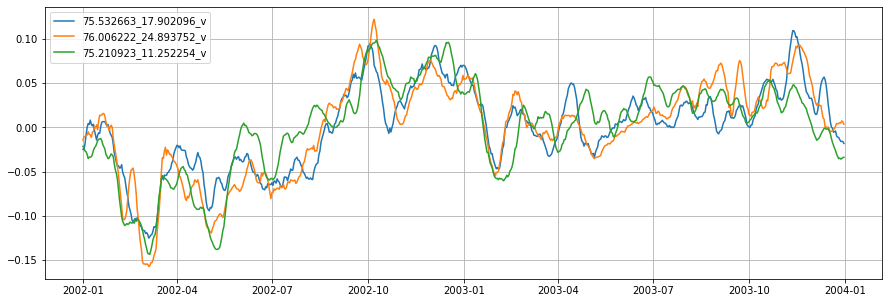

In [120]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(df_rean['dates'], df_rean['75.532663_17.902096_v'], label='75.532663_17.902096_v')
plt.plot(df_rean['dates'], df_rean['76.006222_24.893752_v'], label='76.006222_24.893752_v')
plt.plot(df_rean['dates'], df_rean['75.210923_11.252254_v'], label='75.210923_11.252254_v')
plt.legend()
plt.grid()
plt.show()

## Частотная оценка ряда

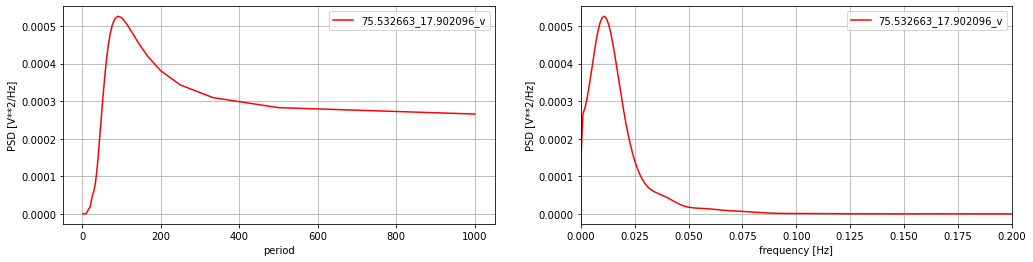

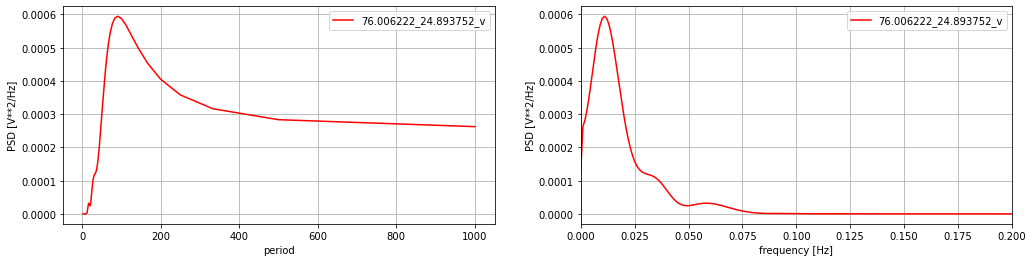

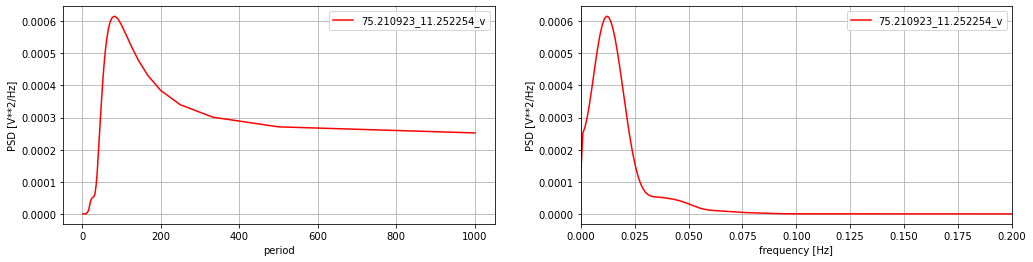

In [121]:
plt.rcParams['figure.figsize'] = [17, 4]

b_f, b_Pxx_den = signal.welch(df_rean['75.532663_17.902096_v'], fs=1, scaling='spectrum', nfft = 1000, nperseg=100)

plt.subplot(1, 2, 1)
plt.plot(1/b_f, b_Pxx_den, c='r', label='75.532663_17.902096_v')
plt.grid()
plt.legend()
plt.xlabel('period')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(1, 2, 2)
plt.plot(b_f, b_Pxx_den, c='r', label='75.532663_17.902096_v')
plt.xlim(0, 0.2)
plt.grid()
plt.legend()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

##########################################
b_f, b_Pxx_den = signal.welch(df_rean['76.006222_24.893752_v'], fs=1, scaling='spectrum', nfft = 1000, nperseg=100)

plt.subplot(1, 2, 1)
plt.plot(1/b_f, b_Pxx_den, c='r', label='76.006222_24.893752_v')
plt.grid()
plt.legend()
plt.xlabel('period')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(1, 2, 2)
plt.plot(b_f, b_Pxx_den, c='r', label='76.006222_24.893752_v')
plt.xlim(0, 0.2)
plt.grid()
plt.legend()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

##########################################
b_f, b_Pxx_den = signal.welch(df_rean['75.210923_11.252254_v'], fs=1, scaling='spectrum', nfft = 1000, nperseg=100)

plt.subplot(1, 2, 1)
plt.plot(1/b_f, b_Pxx_den, c='r', label='75.210923_11.252254_v')
plt.grid()
plt.legend()
plt.xlabel('period')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(1, 2, 2)
plt.plot(b_f, b_Pxx_den, c='r', label='75.210923_11.252254_v')
plt.xlim(0, 0.2)
plt.grid()
plt.legend()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

## Оценка цикличности и остатков

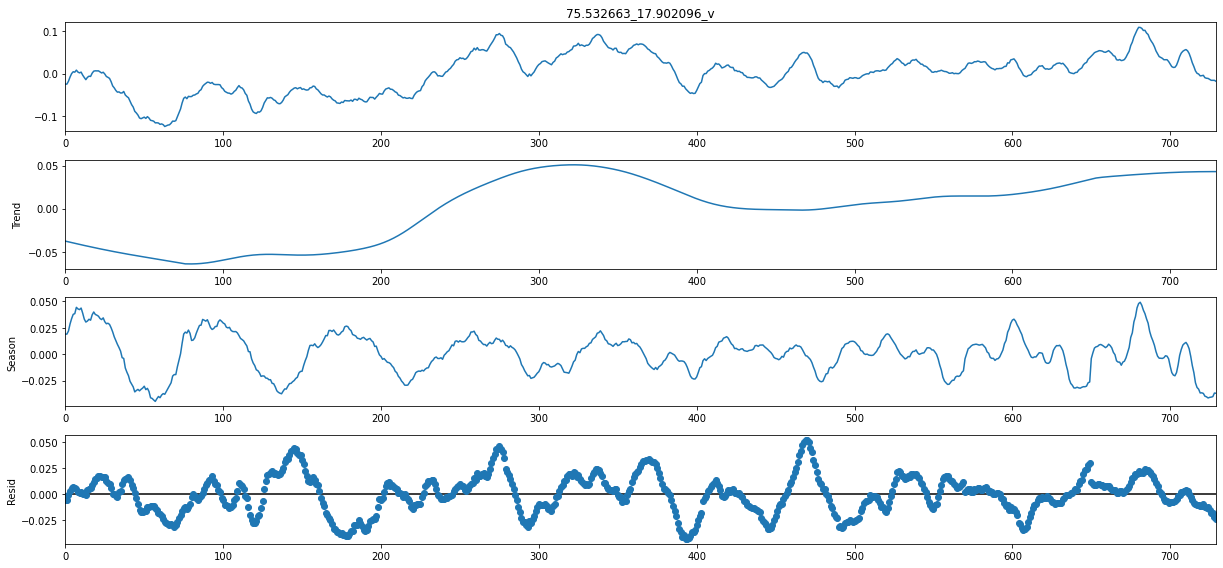

In [122]:
plt.rcParams['figure.figsize'] = [17, 8]
stl = STL(df_rean['75.532663_17.902096_v'], period=80)
res = stl.fit()
fig = res.plot()

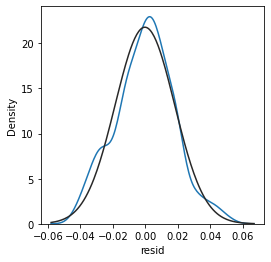

KstestResult(statistic=0.03269625328449327, pvalue=0.40737160805141126)


In [123]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(res.resid, fit=norm, hist=False)
plt.show()
params = norm.fit(res.resid)
ks = kstest(res.resid, 'norm', params, N=1000)
print(ks)
if (ks[1]>=0.07):
    ds_no_resid=df_rean['75.532663_17.902096_v']-res.resid
    df_rean['75.532663_17.902096_no_res']=ds_no_resid
else:
    df_rean['75.532663_17.902096_no_res']=df_rean['75.532663_17.902096_v']

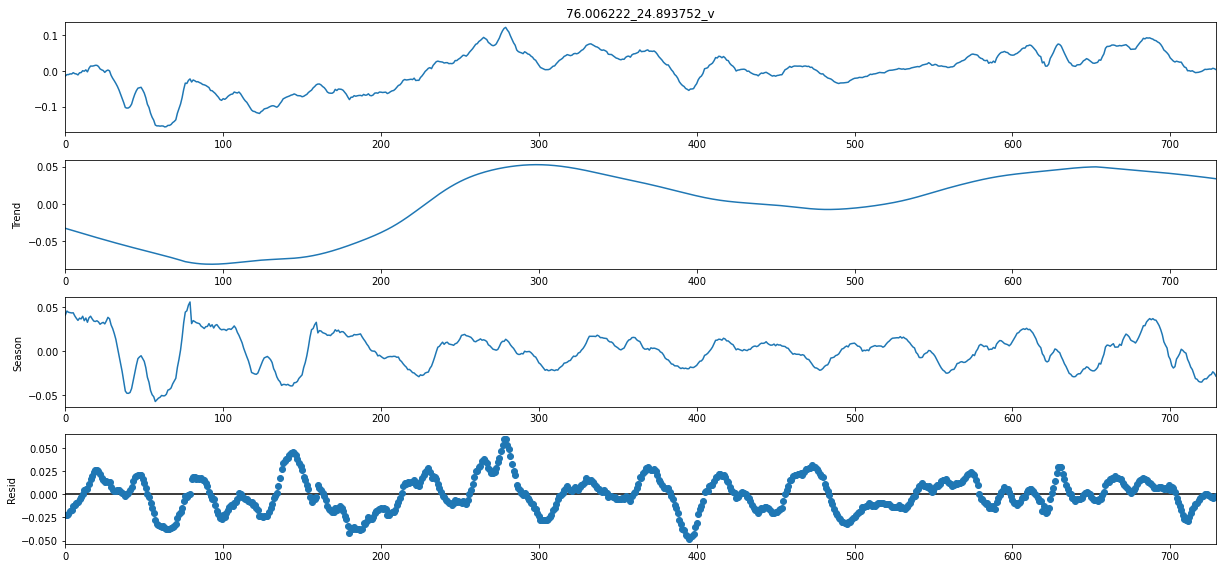

In [124]:
plt.rcParams['figure.figsize'] = [17, 8]
stl = STL(df_rean['76.006222_24.893752_v'], period=80)
res = stl.fit()
fig = res.plot()

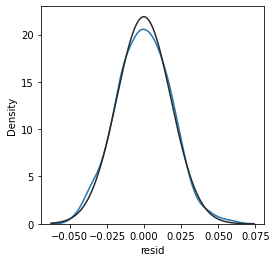

KstestResult(statistic=0.014636302879218743, pvalue=0.9970486051063363)


In [125]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(res.resid, fit=norm, hist=False)
plt.show()
params = norm.fit(res.resid)
ks = kstest(res.resid, 'norm', params, N=1000)
print(ks)
if (ks[1]>=0.07):
    ds_no_resid=df_rean['76.006222_24.893752_v']-res.resid
    df_rean['76.006222_24.893752_no_res']=ds_no_resid
else:
    df_rean['76.006222_24.893752_no_res']=df_rean['76.006222_24.893752_v']

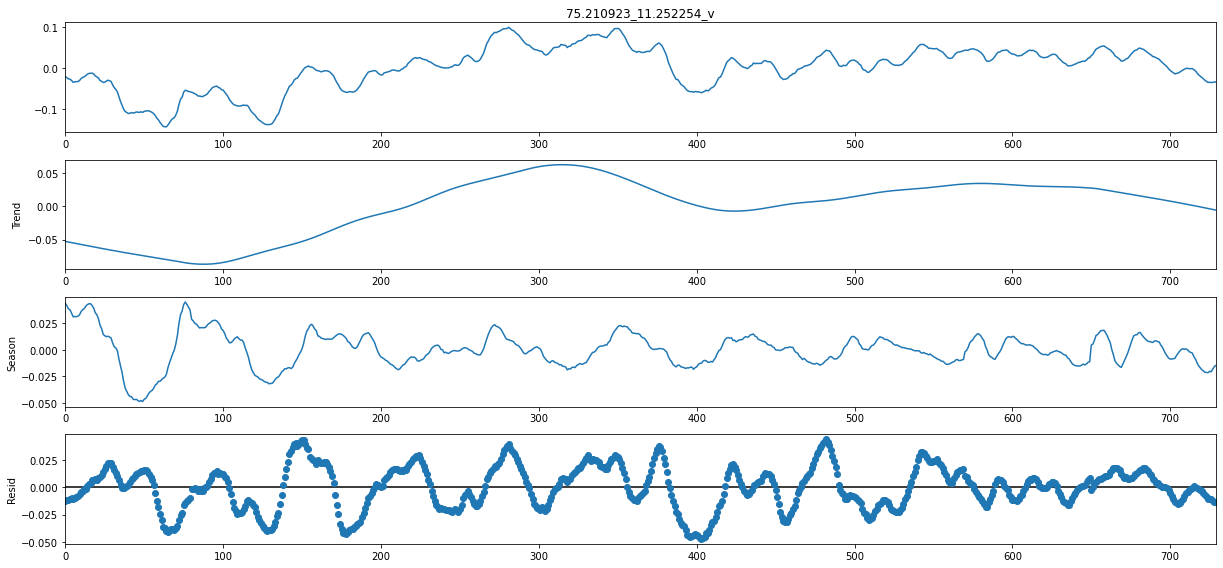

In [126]:
plt.rcParams['figure.figsize'] = [17, 8]
stl = STL(df_rean['75.210923_11.252254_v'], period=80)
res = stl.fit()
fig = res.plot()

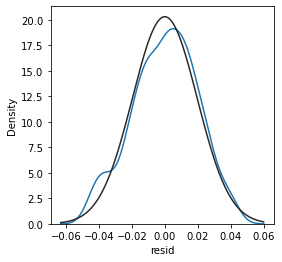

KstestResult(statistic=0.035258125330766554, pvalue=0.31685812948101044)


In [127]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(res.resid, fit=norm, hist=False)
plt.show()
params = norm.fit(res.resid)
ks = kstest(res.resid, 'norm', params, N=1000)
print(ks)
if (ks[1]>=0.07):
    ds_no_resid=df_rean['75.210923_11.252254_v']-res.resid
    df_rean['75.210923_11.252254_no_res']=ds_no_resid
else:
    df_rean['75.210923_11.252254_no_res']=ds_no_resid=df_rean['75.210923_11.252254_v']

## Моделирование ряда без остатков (т.к. у них нормальное распределение)

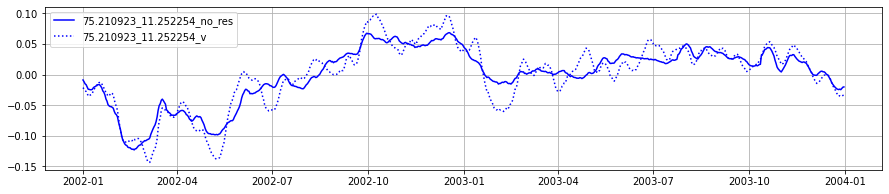

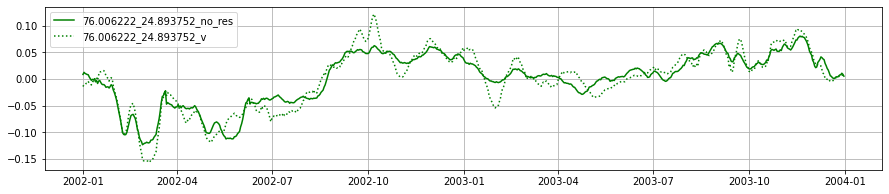

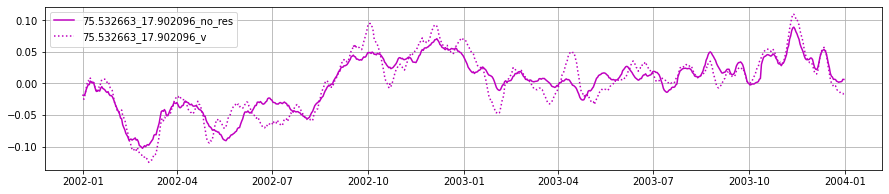

In [128]:
plt.rcParams['figure.figsize'] = [15, 3]

plt.plot(df_rean['dates'], df_rean['75.210923_11.252254_no_res'], label='75.210923_11.252254_no_res', c='b')
plt.plot(df_rean['dates'], df_rean['75.210923_11.252254_v'], label='75.210923_11.252254_v', c='b', linestyle=':')
plt.legend()
plt.grid()
plt.show()

plt.plot(df_rean['dates'], df_rean['76.006222_24.893752_no_res'], label='76.006222_24.893752_no_res', c='g')
plt.plot(df_rean['dates'], df_rean['76.006222_24.893752_v'], label='76.006222_24.893752_v', c='g', linestyle=':')
plt.legend()
plt.grid()
plt.show()

plt.plot(df_rean['dates'], df_rean['75.532663_17.902096_no_res'], label='75.532663_17.902096_no_res', c='m')
plt.plot(df_rean['dates'], df_rean['75.532663_17.902096_v'], label='75.532663_17.902096_v', c='m', linestyle=':')
plt.legend()
plt.grid()
plt.show()

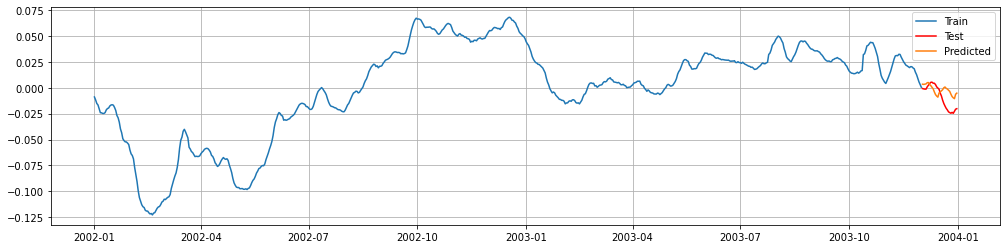

MSE =  0.0001413237826177932
MAE =  0.010012108613207841
MAPE =  -194.733
R^2 =  -0.11465654815880555


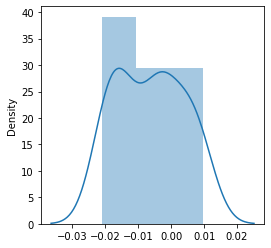

In [129]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA

test = df_rean['75.210923_11.252254_no_res'][-30:]
test.index = df_rean['dates'][-30:]
data = df_rean['75.210923_11.252254_no_res'][:-30]
data.index = df_rean['dates'][:-30]

stlf = STLForecast(data, ARIMA, period=14, model_kwargs={"order": (2, 1, 0)})
model_res = stlf.fit()
forecasts = model_res.forecast(30)
plt.rcParams['figure.figsize'] = [17, 4]
plt.plot(data, label='Train')
plt.plot(test, c='r', label='Test')
plt.plot(forecasts, label='Predicted')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MSE = ", mean_squared_error(test, forecasts))
print("MAE = ", mean_absolute_error(test, forecasts))
print("MAPE = ", round(np.mean(np.abs(test-forecasts)/test)*100,3))
print("R^2 = ", r2_score(test, forecasts))

plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(test-forecasts)
plt.show()

Динамика ловится только в рамках указанной периодичности, нужно что-то сделать с трендом!

Варианты:

1) экзогенный фактор (NEMO или станции температуры/давления поискать, подвигать сам временной ряд)

     - если берем NEMO, то сначала изнасиловать ее извлечением тренда и сглаживанием всяким;     
     - просчитать корреляции с исходным рядом     
2) отдельно смоделировать тренд и отдельно нашу периодичность в 80 дней;

3) просто сделать ансамбль из NEMO и того, что намоделировала ARIMA (будет уместно при адекватном тренде, то есть когда мы его отдельно сделаем)


***отдельное моделирование тренда пока оставлю в покое, так как там похоже годичная динамика, НУЖНО БОЛЬШЕ СКАЧАННЫХ ДАННЫХ***